In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
patch_responses = pd.read_csv('resources/linux/resources/filtered_responses.csv')

In [ ]:
from pypasta import Config
from pypasta.Repository.Mbox import Mbox

config = Config('linux')
mailbox = Mbox(config)

def get_email(message_id):
    try:
        return mailbox.get_messages(message_id)
    except:
        raise

In [104]:
patch_responses['email'] = patch_responses['resp_msg_id'].map(get_email)

In [10]:
patch_responses.sort_values('upstream').head(10)

,Unnamed: 0,patch_id,response_author,resp_parent,resp_msg_id,upstream,response_is_bot,bot_name,patch_author,responder,self_response
125601,125601,<20200306132018.C268A8030792@mail.baikalelectr...,Rob Herring <robh@kernel.org>,<20200306132018.C268A8030792@mail.baikalelectr...,<20200312214340.GA30360@bogus>,0029d097956e700b6b498ce39d6d745adc35b39c,False,NaN,"('', 'sergey.semin@baikalelectronics.ru')","('rob herring', 'robh@kernel.org')",False
125605,125605,<20200528093322.23553-4-Sergey.Semin@baikalele...,Rob Herring <robh@kernel.org>,<20200528093322.23553-4-Sergey.Semin@baikalele...,<20200529191826.GA2785443@bogus>,0029d097956e700b6b498ce39d6d745adc35b39c,False,NaN,"('serge semin', 'sergey.semin@baikalelectronic...","('rob herring', 'robh@kernel.org')",False
125603,125603,<20200527153046.6172-4-Sergey.Semin@baikalelec...,Serge Semin <Sergey.Semin@baikalelectronics.ru>,<20200527153046.6172-4-Sergey.Semin@baikalelec...,<20200527153517.alnci44e464h3ep5@mobilestation>,0029d097956e700b6b498ce39d6d745adc35b39c,False,NaN,"('serge semin', 'sergey.semin@baikalelectronic...","('serge semin', 'sergey.semin@baikalelectronic...",True
135308,135308,<20200331165454.12263-1-vbabka@suse.cz>,"""Kirill A. Shutemov"" <kirill@shutemov.name>",<20200331165454.12263-1-vbabka@suse.cz>,<20200401140544.pkhgfmo5pks3dw6v@box>,002ae7057069538aa3afd500f6f60a429cb948b2,False,NaN,"('vlastimil babka', 'vbabka@suse.cz')","('kirill a. shutemov', 'kirill@shutemov.name')",False
32051,32051,<20200513100944.9171-1-johan@kernel.org>,Johan Hovold <johan@kernel.org>,<20200513100944.9171-1-johan@kernel.org>,<20200513100944.9171-2-johan@kernel.org>,003d80535180f74f262c40462b9fccd7f004901a,False,NaN,"('johan hovold', 'johan@kernel.org')","('johan hovold', 'johan@kernel.org')",True
32053,32053,<20200513100944.9171-1-johan@kernel.org>,"""tip-bot2 for Johan Hovold"" <tip-bot2@linutron...",<20200513100944.9171-1-johan@kernel.org>,<159057872863.17951.8342592736776396338.tip-bo...,003d80535180f74f262c40462b9fccd7f004901a,True,tip-bot2@linutronix.de,"('johan hovold', 'johan@kernel.org')","('tip-bot2 for johan hovold', 'tip-bot2@linutr...",False
32055,32055,<20200513100944.9171-1-johan@kernel.org>,Johan Hovold <johan@kernel.org>,<20200513100944.9171-1-johan@kernel.org>,<20200527082950.GI5276@localhost>,003d80535180f74f262c40462b9fccd7f004901a,False,NaN,"('johan hovold', 'johan@kernel.org')","('johan hovold', 'johan@kernel.org')",True
34128,34128,<159260629601.2218121.13958646181773576175.stg...,David Miller <davem@davemloft.net>,<159260629601.2218121.13958646181773576175.stg...,<20200620.213240.344394880607292689.davem@dave...,0041cd5a50442db6e456b145892a0eaf2dff061f,False,NaN,"('david howells', 'dhowells@redhat.com')","('david miller', 'davem@davemloft.net')",False
34845,34845,<20200621142537.784191-1-maz@kernel.org>,Sasha Levin <sashal@kernel.org>,<20200621142537.784191-1-maz@kernel.org>,<20200625145359.5E103207E8@mail.kernel.org>,005c34ae4b44f085120d7f371121ec7ded677761,False,NaN,"('marc zyngier', 'maz@kernel.org')","('sasha levin', 'sashal@kernel.org')",False
34847,34847,<20200624195811.435857-8-maz@kernel.org>,Sasha Levin <sashal@kernel.org>,<20200624195811.435857-8-maz@kernel.org>,<20200710140258.242EB20849@mail.kernel.org>,005c34ae4b44f085120d7f371121ec7ded677761,False,NaN,"('marc zyngier', 'maz@kernel.org')","('sasha levin', 'sashal@kernel.org')",False


In [106]:
import re

# Debian emails seem to have their own format of mailing list names
# I use some regex magic and drop the archive information so that
# I can later aggregate them all together
# <nbd@other.debian.org> archive/latest/746
debian_regex = re.compile('<(.*)> .*')

def try_get_list(resp_msg_id):
    try:
        lists = mailbox.get_lists(resp_msg_id)
        matched = []
        for listname in lists:
            m = debian_regex.match(listname)
            if not m:
                matched.append(listname)
            else:
                matched.append(m.groups(0)[0])
        return matched
    except:
        raise

patch_responses['mailing_list'] = patch_responses['resp_msg_id'].map(try_get_list)

In [ ]:
def try_get_date(email):
    try:
        return pd.to_datetime(email[0]['Date'], utc=True)
    except:
        None

patch_responses['date'] = patch_responses['email'].map(try_get_date)\
                                                    .dt.to_period('W')\
                                                    .map(lambda x: x.to_timestamp())

In [108]:
patch_responses.drop('email', inplace=True, axis=1)

In [109]:
patch_responses.count()

Unnamed: 0         188534
patch_id           188534
response_author    188534
resp_parent        188534
resp_msg_id        188534
upstream            20609
response_is_bot    188534
bot_name            16097
patch_author       188534
responder          188534
self_response      188534
mailing_list       188534
date               173820
dtype: int64

In [ ]:
cols = list(patch_responses.columns)
cols.remove('mailing_list')
patch_responses = patch_responses.set_index(cols)

In [113]:
patch_responses = pd.melt(patch_responses['mailing_list'].apply(pd.Series).reset_index(), 
            id_vars=cols,
            value_name='mailing_list').sort_index()
patch_responses.drop('variable', axis=1, inplace=True)

Text(0.5, 0, 'Number of responses')

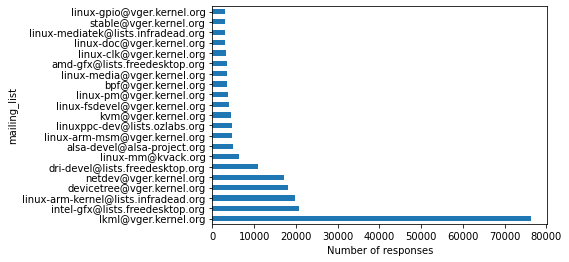

In [116]:
ax = patch_responses.groupby('mailing_list').nunique()['resp_msg_id']\
                .sort_values(ascending=False)[:21]\
                .plot.barh()

ax.set_xlabel('Number of responses')

E.g., how many patches have not been exposed to a review on the mailing list in the last three years?

Which mailing lists are used for review in the kernel community? How many lists? How much traffic? Let us show this data for the last ten years.

Text(0.5, 0, 'Number of patches')

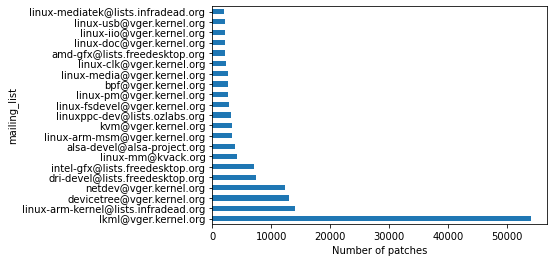

In [117]:
ax = patch_responses.groupby('mailing_list').nunique()['patch_id']\
                .sort_values(ascending=False)[:21]\
                .plot.barh()

ax.set_xlabel('Number of patches')

In [118]:
patch_counts = patch_responses[['date','patch_id']].groupby('date').nunique()['patch_id'].reset_index()
response_counts = patch_responses[['date','resp_msg_id']].groupby('date').nunique()['resp_msg_id'].reset_index()

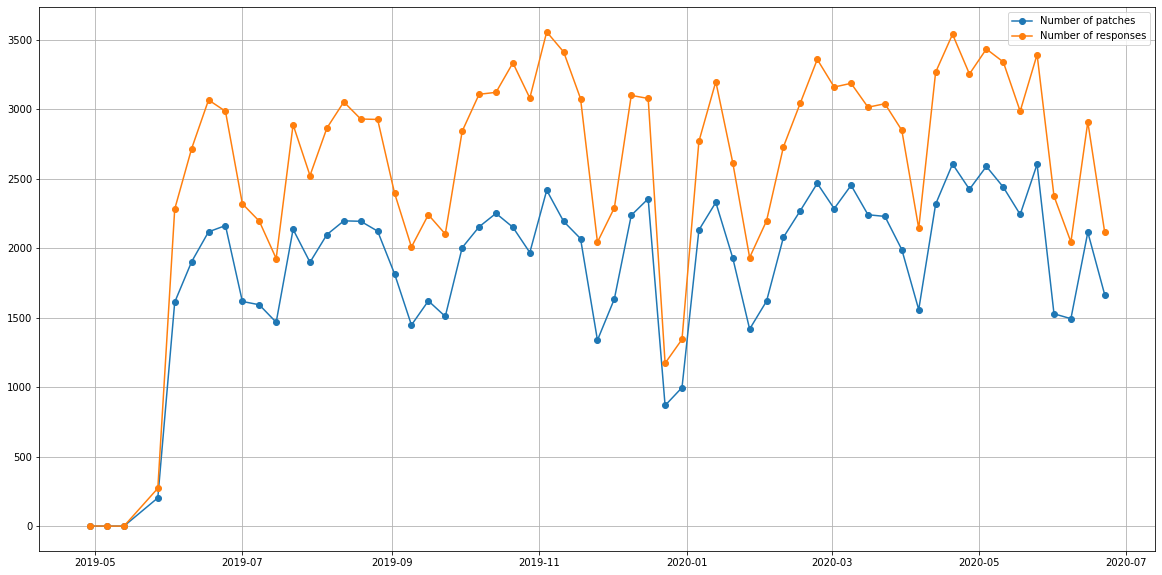

In [119]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(patch_counts['date'],
        patch_counts['patch_id'],
        marker='o')

ax.plot(response_counts['date'],
        response_counts['resp_msg_id'],
        marker='o')

ax.grid()

ax.legend(['Number of patches', 'Number of responses'])

In [120]:
patch_counts = patch_responses.groupby(['mailing_list', 'date'])\
                                .nunique()['patch_id']\
                                .reset_index()\
                                .sort_values('date')
response_counts = patch_responses.groupby(['mailing_list', 'date'])\
                                    .nunique()['resp_msg_id']\
                                    .reset_index()\
                                    .sort_values('date')

top_patch_lists = patch_responses.groupby('mailing_list').nunique()['patch_id']\
                .sort_values(ascending=False)[:10].reset_index()['mailing_list']
top_response_lists = patch_responses.groupby('mailing_list').nunique()['resp_msg_id']\
                .sort_values(ascending=False)[:10].reset_index()['mailing_list']

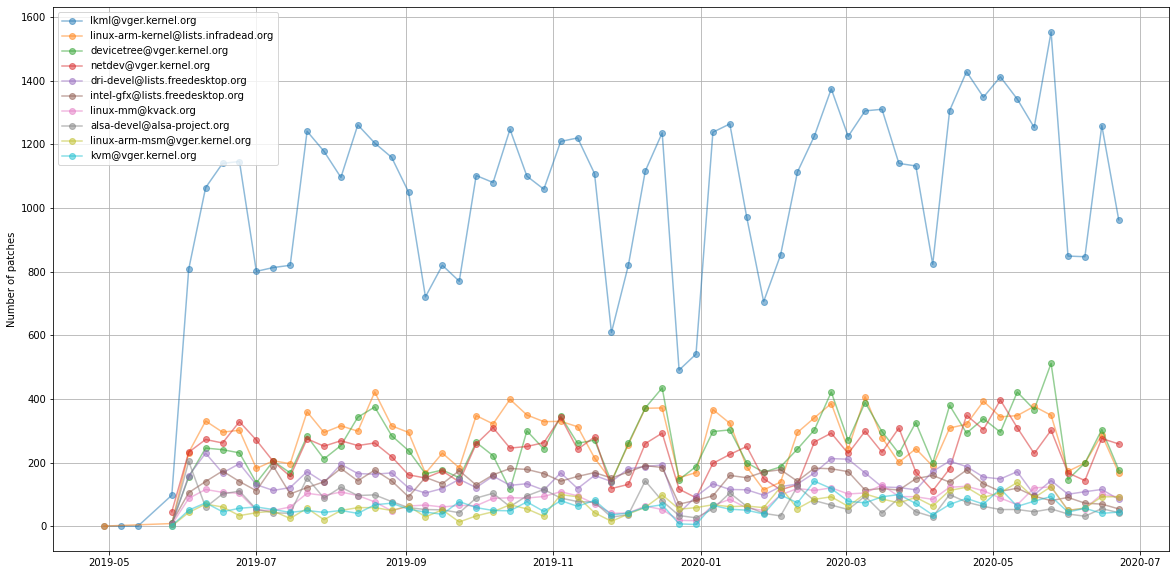

In [121]:
fig, ax = plt.subplots(figsize=(20, 10))

for mailing_list in top_patch_lists:
    mask = patch_counts['mailing_list'] == mailing_list
    ax.plot(patch_counts.loc[mask]['date'],
            patch_counts.loc[mask]['patch_id'],
            marker='o', alpha=0.5)
ax.grid()

ax.set_ylabel('Number of patches')

ax.legend(top_patch_lists)

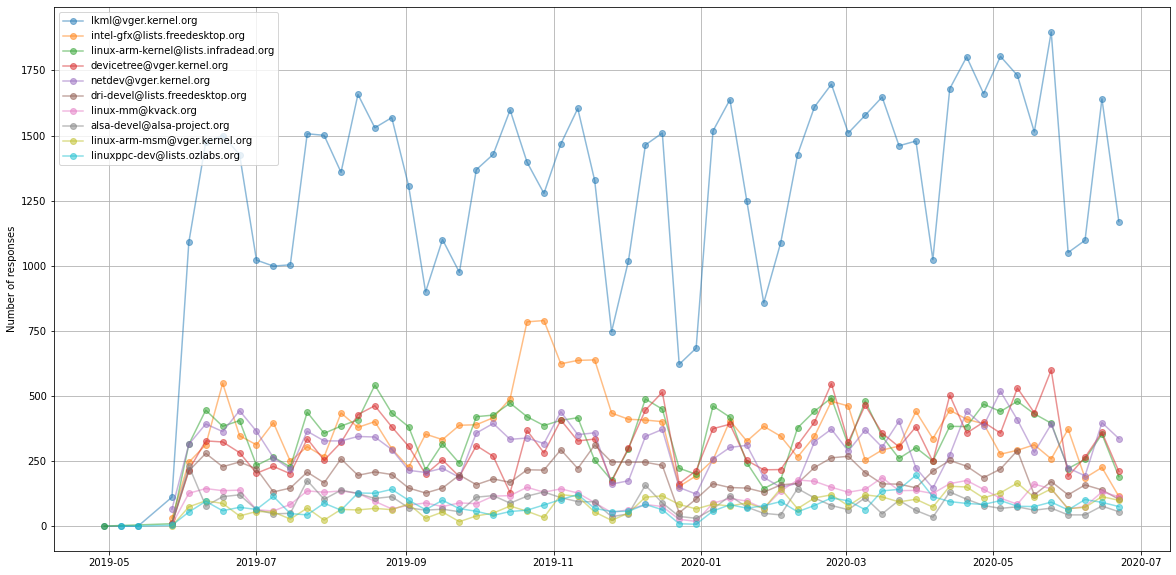

In [122]:
fig, ax = plt.subplots(figsize=(20, 10))

for mailing_list in top_response_lists:
    mask = response_counts['mailing_list'] == mailing_list
    ax.plot(response_counts.loc[mask]['date'],
            response_counts.loc[mask]['resp_msg_id'],
            marker='o', alpha=0.5)
ax.grid()
ax.set_ylabel('Number of responses')

ax.legend(top_response_lists)

In [123]:
commit_counts = patch_responses.groupby(['mailing_list', 'date'])\
                                .nunique()['upstream']\
                                .reset_index()\
                                .sort_values('date')

top_commit_lists = patch_responses.groupby('mailing_list').nunique()['upstream']\
                .sort_values(ascending=False)[:10].reset_index()['mailing_list']


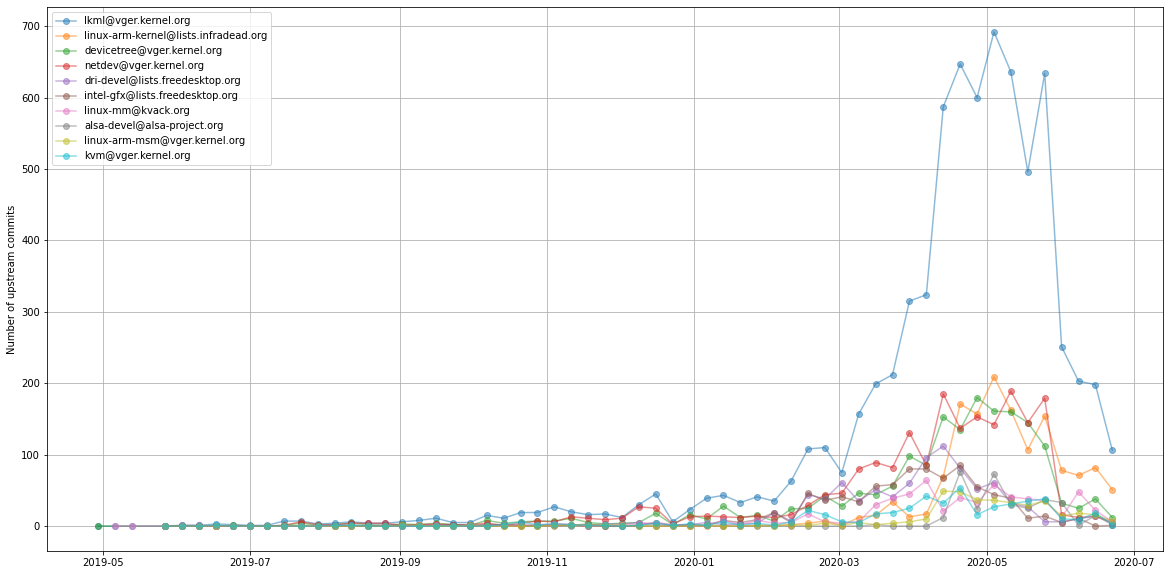

In [124]:
fig, ax = plt.subplots(figsize=(20, 10))

for mailing_list in top_commit_lists:
    mask = commit_counts['mailing_list'] == mailing_list
    ax.plot(commit_counts.loc[mask]['date'],
            commit_counts.loc[mask]['upstream'],
            marker='o', alpha=0.5)
ax.grid()

ax.set_ylabel('Number of upstream commits')

ax.legend(top_patch_lists)